In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/videogamesales/vgsales.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv("../input/videogamesales/vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
df.isnull().sum()


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
df = df.dropna()
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

# Relation between Platform and Genre

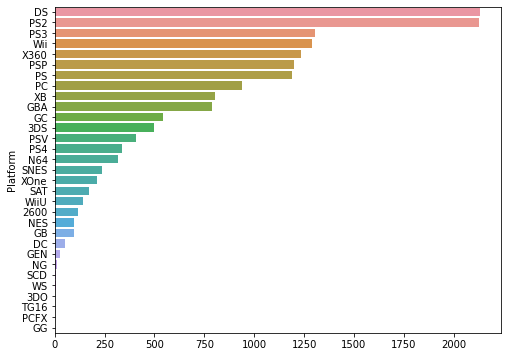

In [7]:
platGenre = pd.crosstab(df.Platform,df.Genre)
platGenreTotal = platGenre.sum(axis=1).sort_values(ascending = False)
plt.figure(figsize=(8,6))
sns.barplot(y = platGenreTotal.index, x = platGenreTotal.values, orient='h')
plt.ylabel = "Platform"
plt.xlabel = "The amount of games"
plt.show()

#### Insight 1: You can see DS and PS2 have the most games in their platform and now, we can see the detail of genre of game in platform that have more than 1000 games. In the seaborn, it is easy to use heatmap rather than the stacked bar, so we can use the heatmap to have a try.

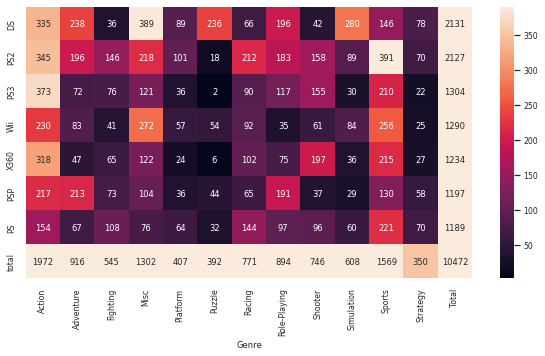

In [8]:
platGenre['Total'] = platGenre.sum(axis=1)
popPlatform = platGenre[platGenre['Total']>1000].sort_values(by='Total', ascending = False)
neededdata = popPlatform.loc[:,:'Strategy']
maxi = neededdata.values.max()
mini = neededdata.values.min()
popPlatformfinal = popPlatform.append(pd.DataFrame(popPlatform.sum(), columns=['total']).T, ignore_index=False)
sns.set(font_scale=0.7)
plt.figure(figsize=(10,5))
sns.heatmap(popPlatformfinal, vmin = mini, vmax = maxi, annot=True, fmt="d")
plt.xticks(rotation = 90)
plt.show()

#### Insight 2 : So, you can see the popular genre game of DS, PS2 and PS3.

And we also can get each genre of game sales in every area by groupby. And we will show you the absolute data and the percentage in the same time.

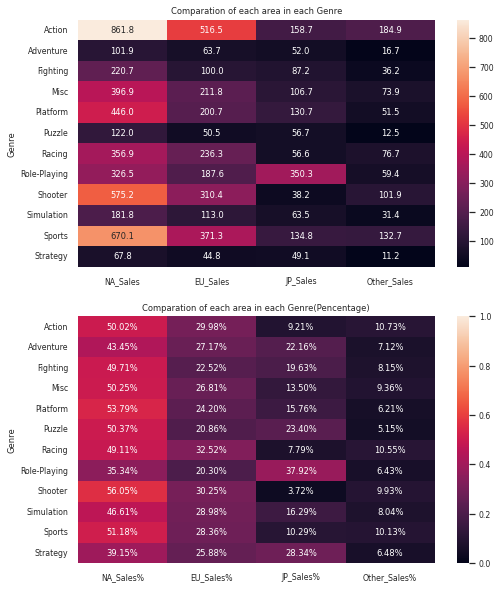

In [9]:
GenreGroup = df.groupby(['Genre']).sum().loc[:, 'NA_Sales':'Global_Sales']
GenreGroup['NA_Sales%'] = GenreGroup['NA_Sales']/GenreGroup['Global_Sales']
GenreGroup['EU_Sales%'] = GenreGroup['EU_Sales']/GenreGroup['Global_Sales']
GenreGroup['JP_Sales%'] = GenreGroup['JP_Sales']/GenreGroup['Global_Sales']
GenreGroup['Other_Sales%'] = GenreGroup['Other_Sales']/GenreGroup['Global_Sales']
plt.figure(figsize=(8, 10))
sns.set(font_scale=0.7)
plt.subplot(211)
sns.heatmap(GenreGroup.loc[:, 'NA_Sales':'Other_Sales'], annot=True, fmt = '.1f')
plt.title("Comparation of each area in each Genre")
plt.subplot(212)
sns.heatmap(GenreGroup.loc[:,'NA_Sales%':'Other_Sales%'], vmax =1, vmin=0, annot=True, fmt = '.2%')
plt.title("Comparation of each area in each Genre(Pencentage)")
plt.show()

So, the percentage is more clearly than the absolute amount.

Here is a VERY IMPORTANT step, I will now filter the entries, I will only take entries where the Year of release is >=2000

In [10]:
sales = df.copy()
sales = sales.drop(sales[sales.Year < 2000].index)

Now, another step of cleaning, I will check if the Entries for the 'Global_Sales' really match the Original formula (NA+EU+JP+Other Sales)

In [11]:
sales['Calc_Global']= (sales['NA_Sales'] + sales['EU_Sales'] + sales['JP_Sales'] + sales['Other_Sales'])
sales['Calc_Global'].head()

0    82.74
2    35.83
3    33.00
6    30.01
7    29.01
Name: Calc_Global, dtype: float64

In [12]:
(sales['Calc_Global'] != sales['Global_Sales']).sum()

5947

In [13]:
sales['Year'].unique()

array([2006., 2008., 2009., 2005., 2007., 2010., 2013., 2004., 2002.,
       2001., 2011., 2015., 2012., 2014., 2003., 2000., 2016., 2020.,
       2017.])

Checking if our Year>=2000 filter works

# Sales Analysis For years > 2000

## Starting off, I will run the analysis on the American Region, only releases between the Years 2000~2020 will be considered.

In [14]:
NA_genre = sales.groupby(by=['Genre'])['NA_Sales'].sum()
NA_genre = NA_genre.reset_index()
NA_genre = NA_genre.sort_values(by=['NA_Sales'], ascending=False)

Text(0.5, 1.0, 'Total Sales in NA per Genre (Years 2000 to 2020)')

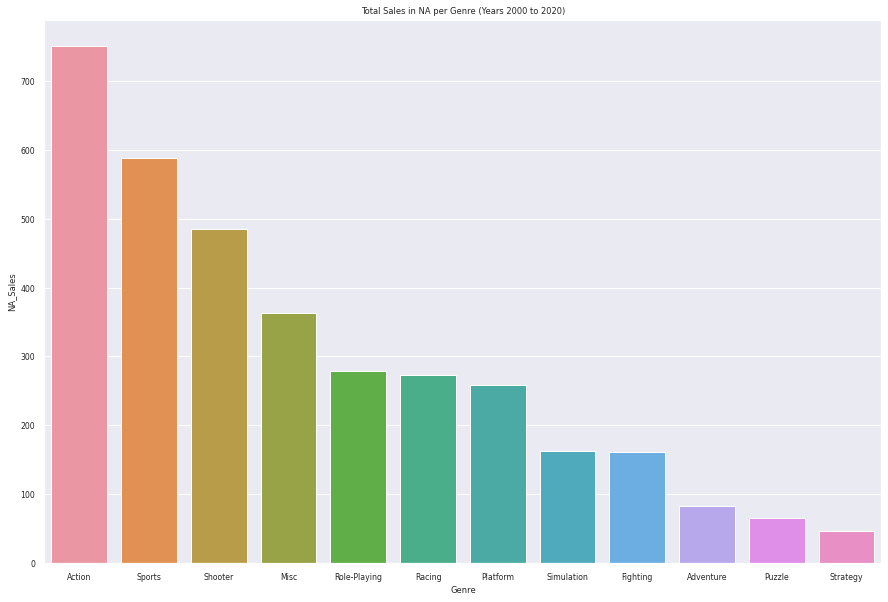

In [15]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="NA_Sales",data=NA_genre)
plt.title('Total Sales in NA per Genre (Years 2000 to 2020)')

#### Insight 3a  for US : As we can observe above, Action was by far the best seller, with Sports and Shooter right below.

### Now we will check which platforms were the most requisited

In [16]:
NA_plat = sales.groupby(by=['Platform'])['NA_Sales'].sum()
NA_plat = NA_plat.reset_index()
NA_plat = NA_plat.sort_values(by=['NA_Sales'], ascending=False)

Text(0.5, 1.0, 'Total Sales in NA per Platform (Years 2000 to 2020)')

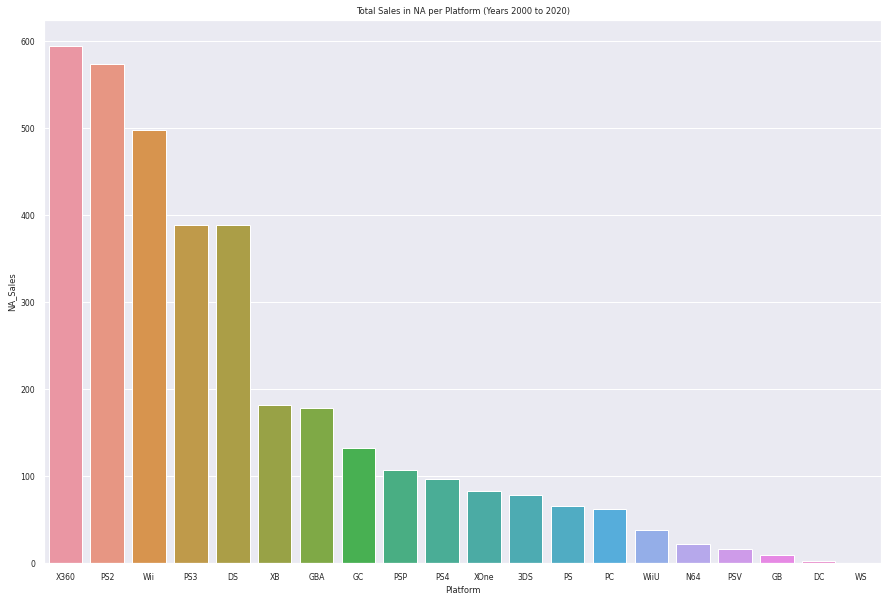

In [17]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="NA_Sales",data=NA_plat)

plt.title('Total Sales in NA per Platform (Years 2000 to 2020)')

#### Insight 3b  for US :  XBOX360 takes the first spot, but not far from PS2 followed by Wii.



### Finally, Publishers are next.

In [18]:
NA_pub = sales[['Publisher', 'NA_Sales']]
NA_pub = NA_pub.groupby('Publisher')['NA_Sales'].sum().sort_values(ascending=False).head(10)
NA_pub = pd.DataFrame(NA_pub).reset_index()

Text(0.5, 1.0, 'Total Sales in NA per Publisher (Years 2000 to 2020)')

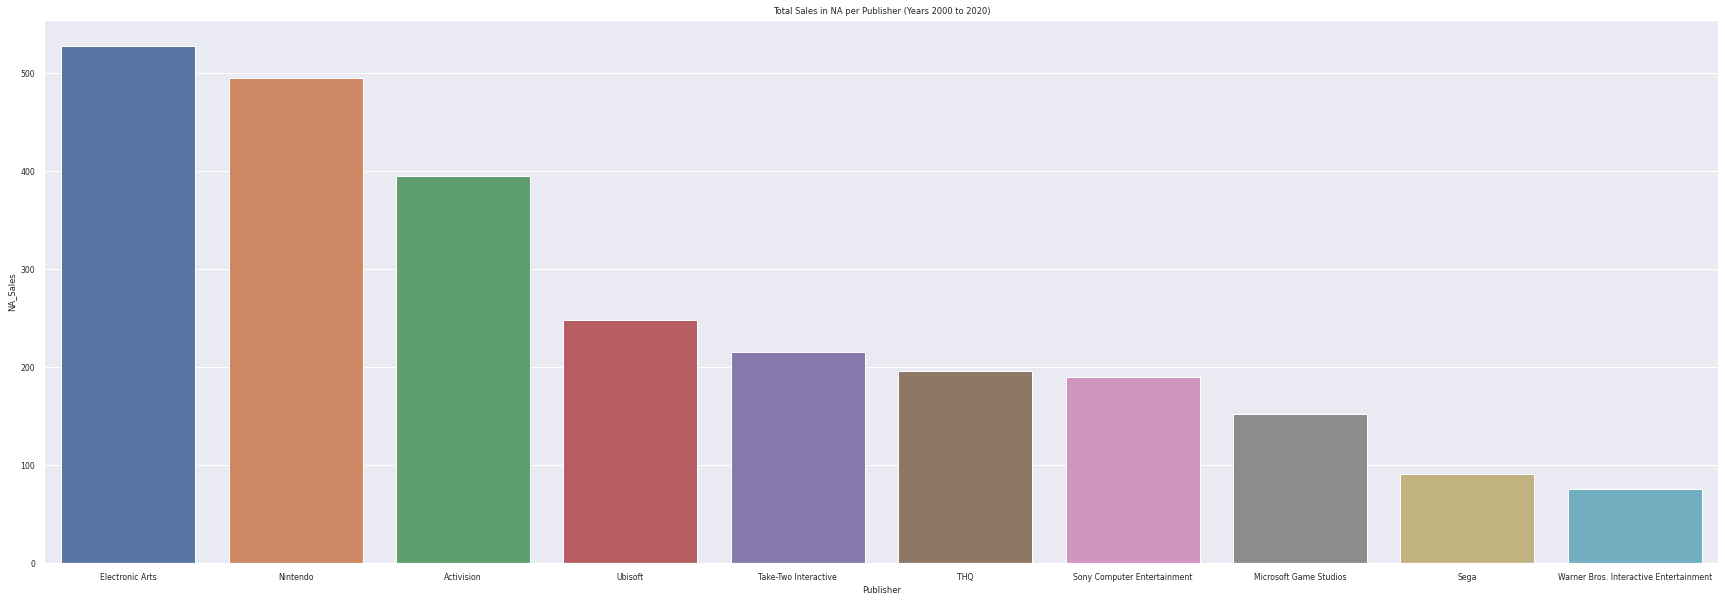

In [19]:
plt.figure(figsize=(30, 10))
sns.barplot(x="Publisher", y="NA_Sales",data=NA_pub)
plt.title('Total Sales in NA per Publisher (Years 2000 to 2020)')

#### Insight 3c  for US : Our results show that EA, Nintendo and Activision as the Top 3

# EU Analysis

Sales per Genre


Text(0.5, 1.0, 'Total Sales in EU per Genre (Years 2000 to 2020)')

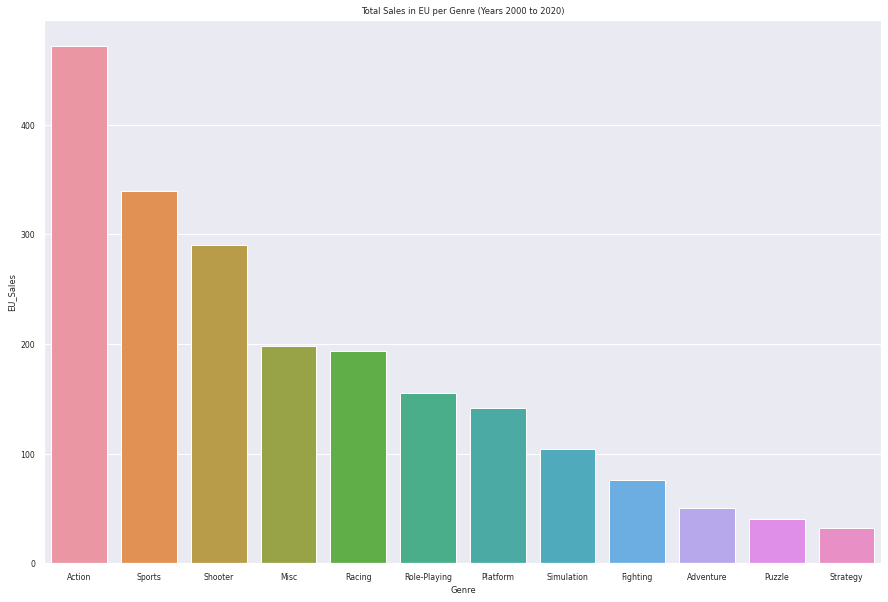

In [20]:
EU_genre = sales.groupby(by=['Genre'])['EU_Sales'].sum()
EU_genre = EU_genre.reset_index()
EU_genre = EU_genre.sort_values(by=['EU_Sales'], ascending=False)

plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="EU_Sales",data=EU_genre)
plt.title('Total Sales in EU per Genre (Years 2000 to 2020)')

#### Insight 4a  for Europe : Similar trend to NA, however, the region has less sales overall and racing takes 5th position if compared to NA's 6th.

### Most Requisited Platforms


In [21]:
EU_plat = sales.groupby(by=['Platform'])['EU_Sales'].sum()
EU_plat = EU_plat.reset_index()
EU_plat = EU_plat.sort_values(by=['EU_Sales'], ascending=False)

Text(0.5, 1.0, 'Total Sales in EU per Platform (Years 2000 to 2020)')

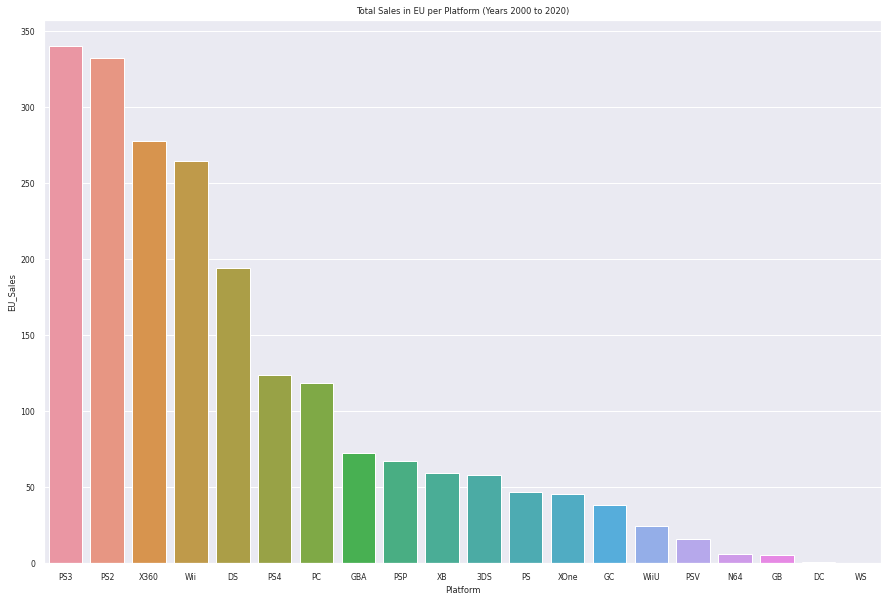

In [22]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="EU_Sales", data=EU_plat)
plt.title('Total Sales in EU per Platform (Years 2000 to 2020)')

#### Insight 4b  for Europe : Here we can see a big difference between regions, with PS3 leading instead of NA's XBOX360



### Sales per Publisher


In [23]:
EU_pub = sales[['Publisher', 'EU_Sales']]
EU_pub = EU_pub.groupby('Publisher')['EU_Sales'].sum().sort_values(ascending=False).head(10)
EU_pub = pd.DataFrame(EU_pub).reset_index()

Text(0.5, 1.0, 'Total Sales in NA per Publisher (Years 2000 to 2020)')

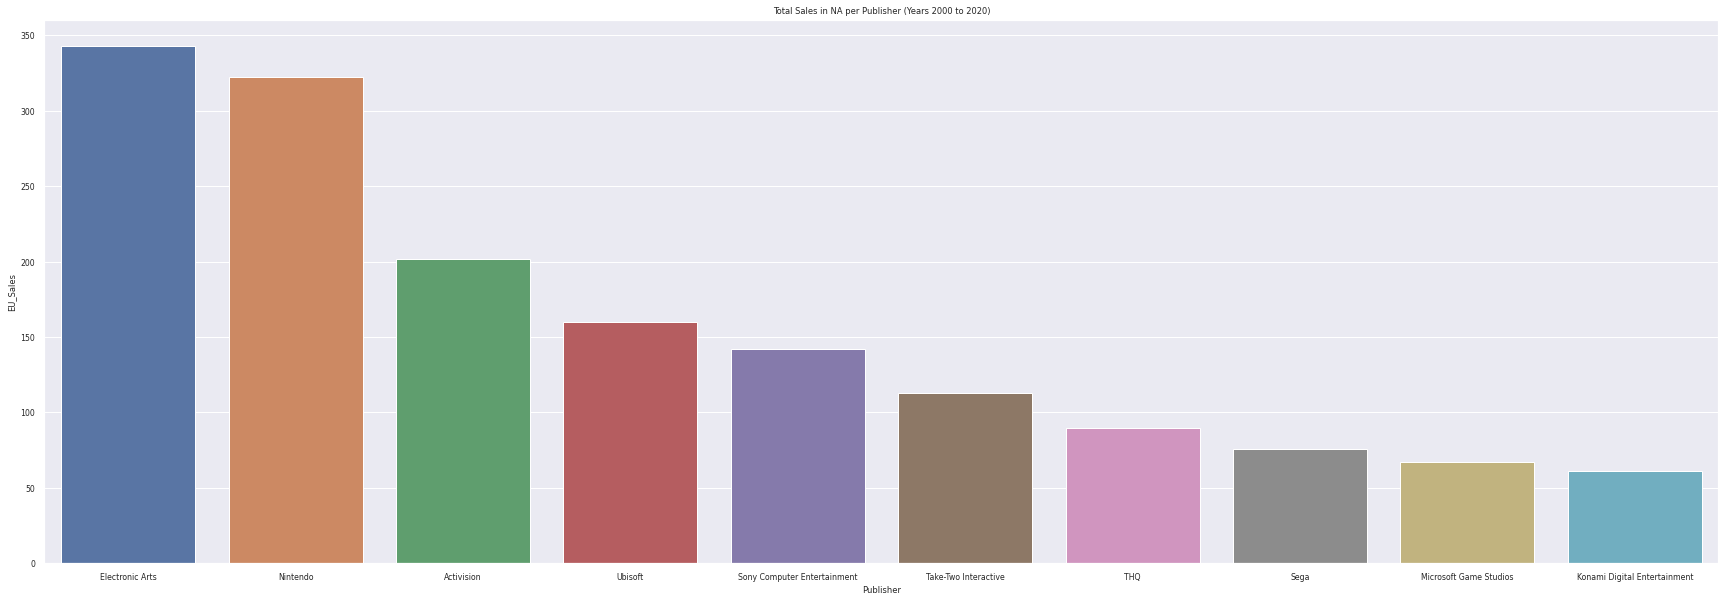

In [24]:
plt.figure(figsize=(30, 10))
sns.barplot(x="Publisher", y="EU_Sales",data=EU_pub)
plt.title('Total Sales in NA per Publisher (Years 2000 to 2020)')

#### Insight 4c  for Europe : Similar trend to NA's, however Sony Computer Entertainment has a better placement



# JP Analysis

### Sales per Genre

In [25]:
JP_genre = sales.groupby(by=['Genre'])['JP_Sales'].sum()
JP_genre = JP_genre.reset_index()
JP_genre = JP_genre.sort_values(by=['JP_Sales'], ascending=False)

Text(0.5, 1.0, 'Total Sales in EU per Genre (Years 2000 to 2020)')

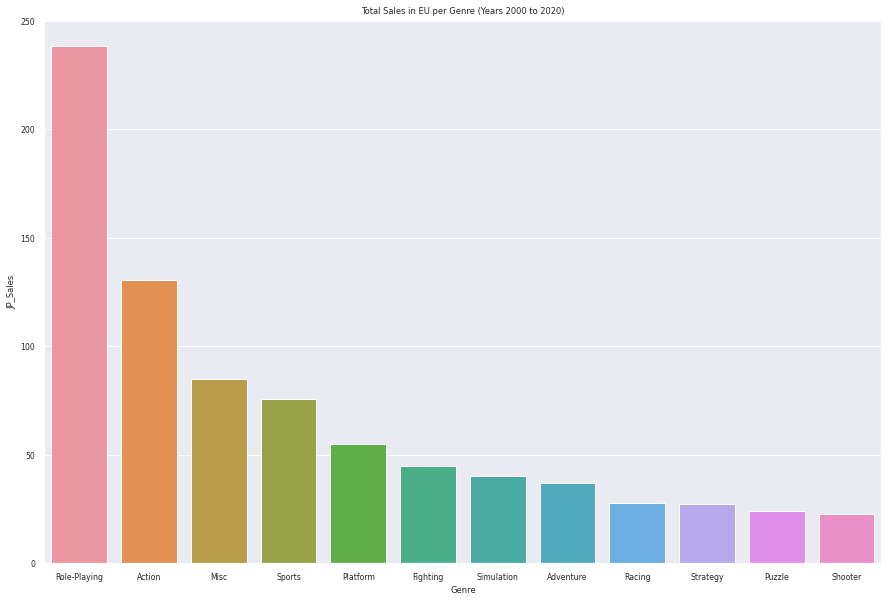

In [26]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="JP_Sales",data=JP_genre)
plt.title('Total Sales in EU per Genre (Years 2000 to 2020)')

#### Insight 5a  for Japan : Now that is a big shift, the graph shows that the Action as rank 1 genre is not true for Japan, customers there prefer Role-Playing more than any other genre.

### Most Requisited Platforms


In [27]:
JP_plat = sales.groupby(by=['Platform'])['JP_Sales'].sum()
JP_plat = JP_plat.reset_index()
JP_plat = JP_plat.sort_values(by=['JP_Sales'], ascending=False)

Text(0.5, 1.0, 'Total Sales in EU per Platform (Years 2000 to 2020)')

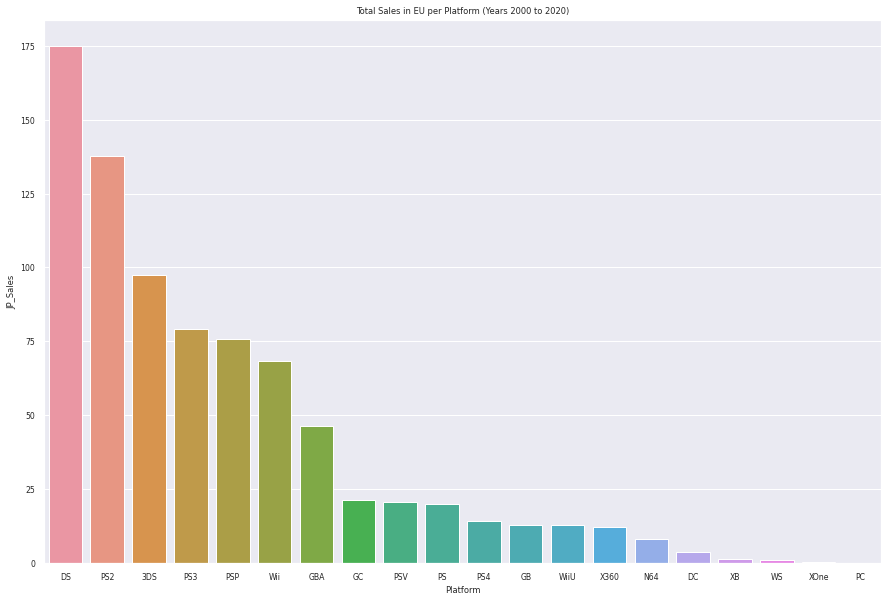

In [28]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="JP_Sales", data=JP_plat)
plt.title('Total Sales in EU per Platform (Years 2000 to 2020)')

#### Insight 5b  for Japan : Another big difference highlighted by this graph, DS is the top ranked Platform with a certain margin from PS2.



### Sales per Publisher


In [29]:
JP_pub = sales[['Publisher', 'JP_Sales']]
JP_pub = JP_pub.groupby('Publisher')['JP_Sales'].sum().sort_values(ascending=False).head(10)
JP_pub = pd.DataFrame(JP_pub).reset_index()

Text(0.5, 1.0, 'Total Sales in NA per Publisher (Years 2000 to 2020)')

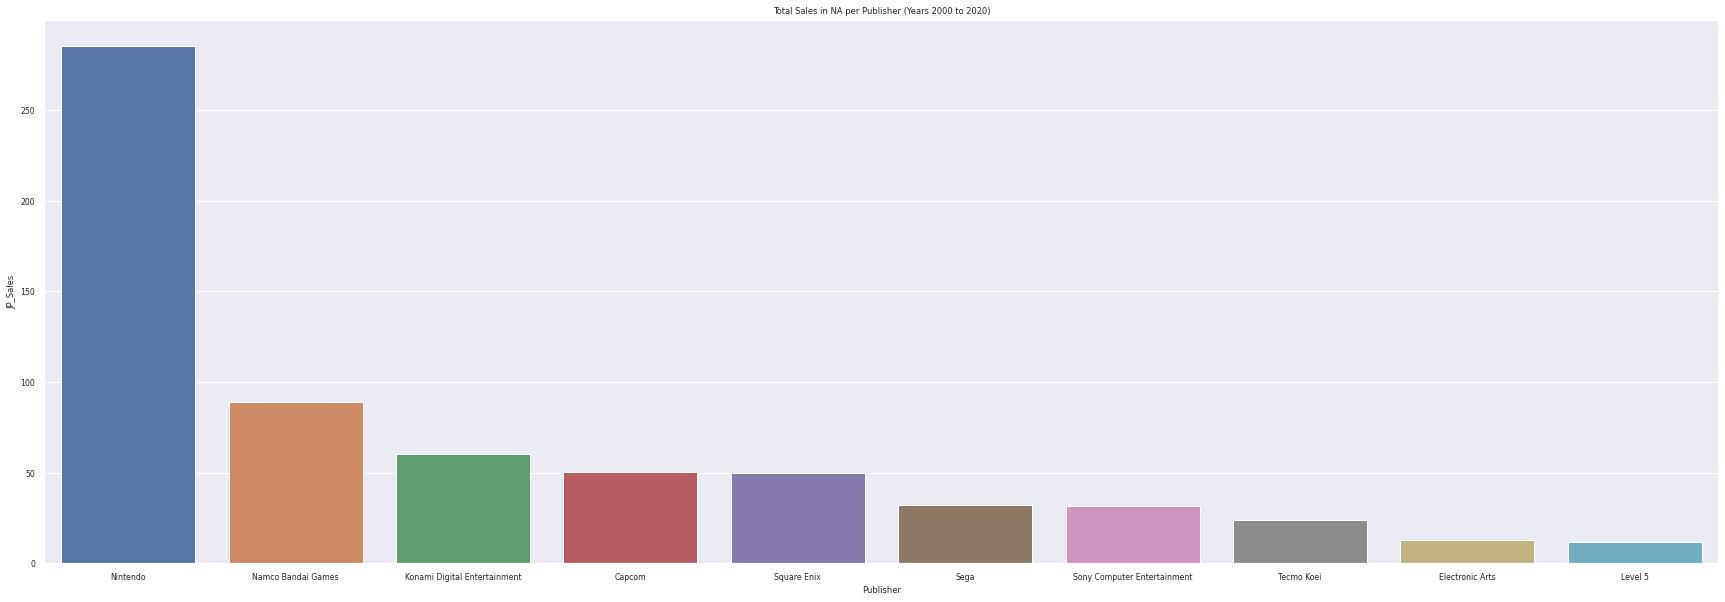

In [30]:
plt.figure(figsize=(30, 10))
sns.barplot(x="Publisher", y="JP_Sales",data=JP_pub)
plt.title('Total Sales in NA per Publisher (Years 2000 to 2020)')

#### Insight 5c  for Japan : I am not surprised by Nintendo being the first place, however, other japanese Publishers seem to be way ahead from Electronic Arts

# Other Analysis

### Sales per Genre

In [31]:
OT_genre = sales.groupby(by=['Genre'])['Other_Sales'].sum()
OT_genre = OT_genre.reset_index()
OT_genre = OT_genre.sort_values(by=['Other_Sales'], ascending=False)

Text(0.5, 1.0, 'Total Sales in EU per Genre (Years 2000 to 2020)')

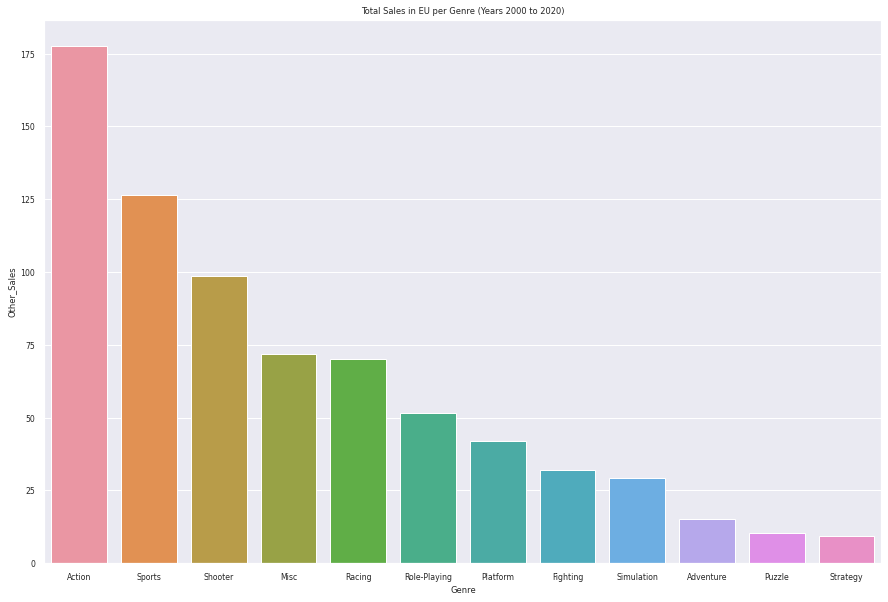

In [32]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="Other_Sales",data=OT_genre)
plt.title('Total Sales in EU per Genre (Years 2000 to 2020)')

#### Insight 6a  for Other Countries : The graph shows that the Action/Sports trend is back, aligning to the NA/EU preferred Genres

### Most Requisited Platforms

In [33]:
OT_plat = sales.groupby(by=['Platform'])['Other_Sales'].sum()
OT_plat = OT_plat.reset_index()
OT_plat = OT_plat.sort_values(by=['Other_Sales'], ascending=False)

Text(0.5, 1.0, 'Total Sales in EU per Platform (Years 2000 to 2020)')

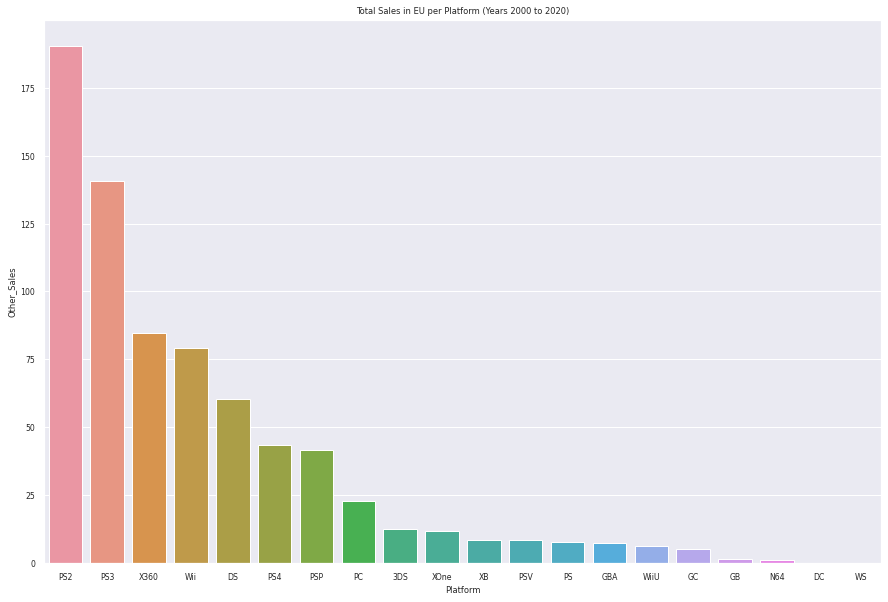

In [34]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="Other_Sales", data=OT_plat)
plt.title('Total Sales in EU per Platform (Years 2000 to 2020)')

#### Insight 6b  for Other Countries : PS2 and PS3 the most popular by a large margin.

### Sales per Publisher

In [35]:
OT_pub = sales[['Publisher', 'Other_Sales']]
OT_pub = OT_pub.groupby('Publisher')['Other_Sales'].sum().sort_values(ascending=False).head(10)
OT_pub = pd.DataFrame(OT_pub).reset_index()

Text(0.5, 1.0, 'Total Sales in NA per Publisher (Years 2000 to 2020)')

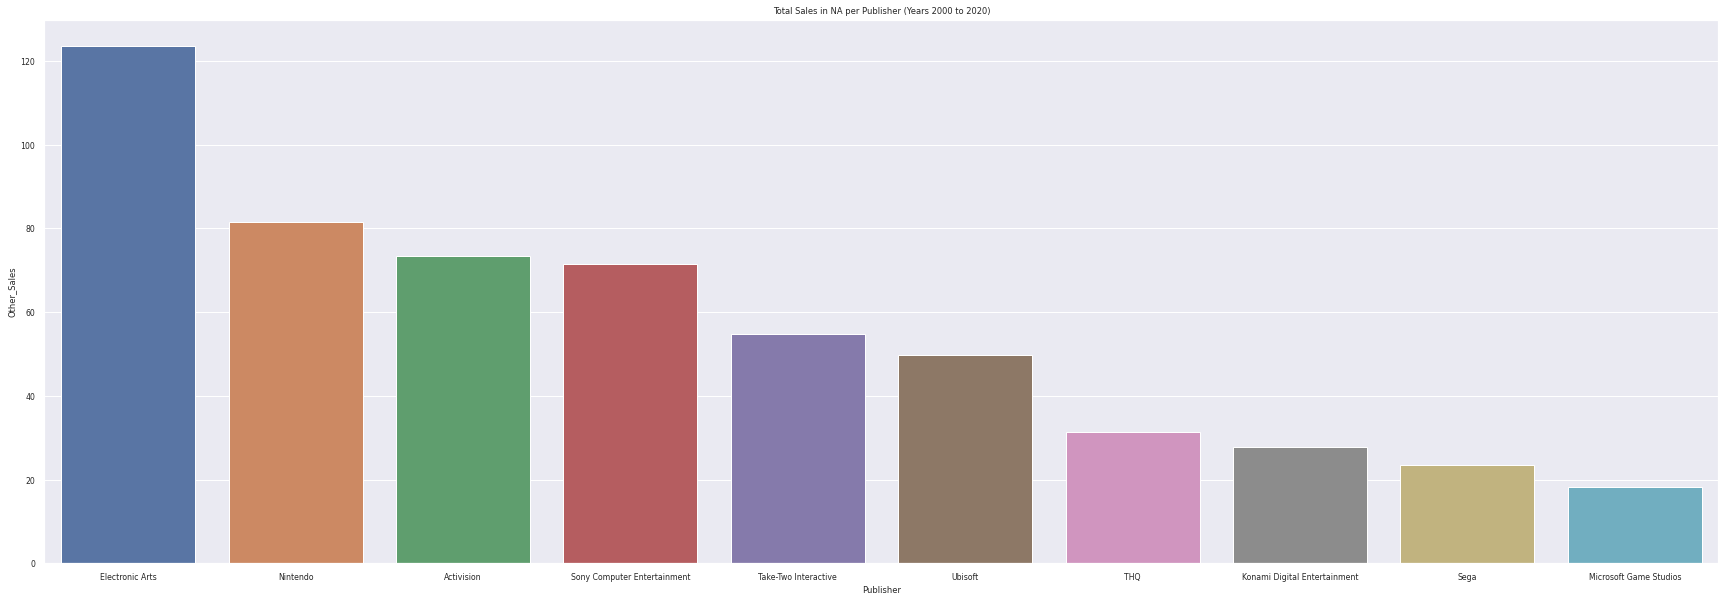

In [36]:
plt.figure(figsize=(30, 10))
sns.barplot(x="Publisher", y="Other_Sales",data=OT_pub)
plt.title('Total Sales in NA per Publisher (Years 2000 to 2020)')

#### Insight 6c  for Other Countries : EA are on top followed by Nintendo and Activion

# Global Analysis

### Sales per Genre

Text(0.5, 1.0, 'Total Sales in EU per Genre (Years 2000 to 2020)')

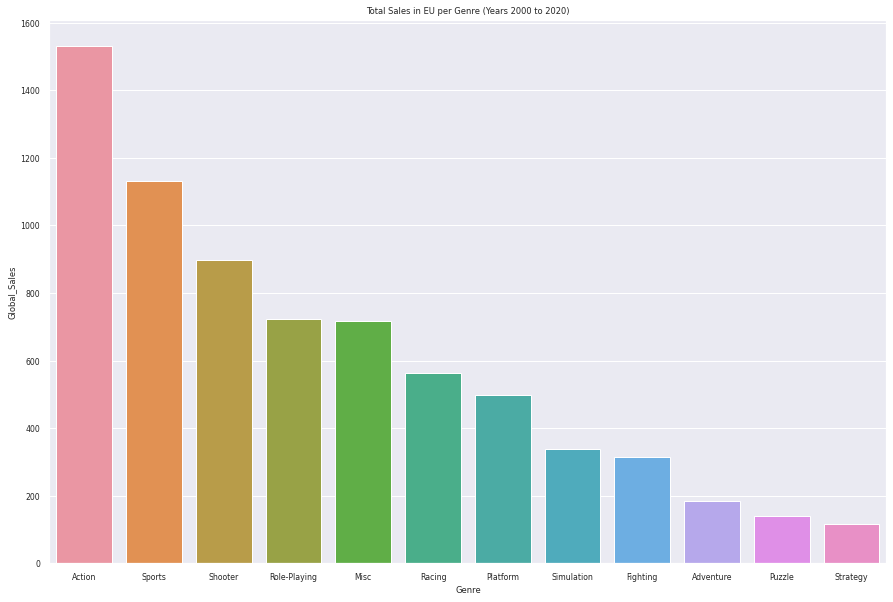

In [37]:
GL_genre = sales.groupby(by=['Genre'])['Global_Sales'].sum()
GL_genre = GL_genre.reset_index()
GL_genre = GL_genre.sort_values(by=['Global_Sales'], ascending=False)
plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="Global_Sales",data=GL_genre)
plt.title('Total Sales in EU per Genre (Years 2000 to 2020)')

#### Insight 7a  Global : Overall, Action games are most famous followed by Sports and Shooting

### Most Requisited Platforms

Text(0.5, 1.0, 'Total Sales in EU per Platform (Years 2000 to 2020)')

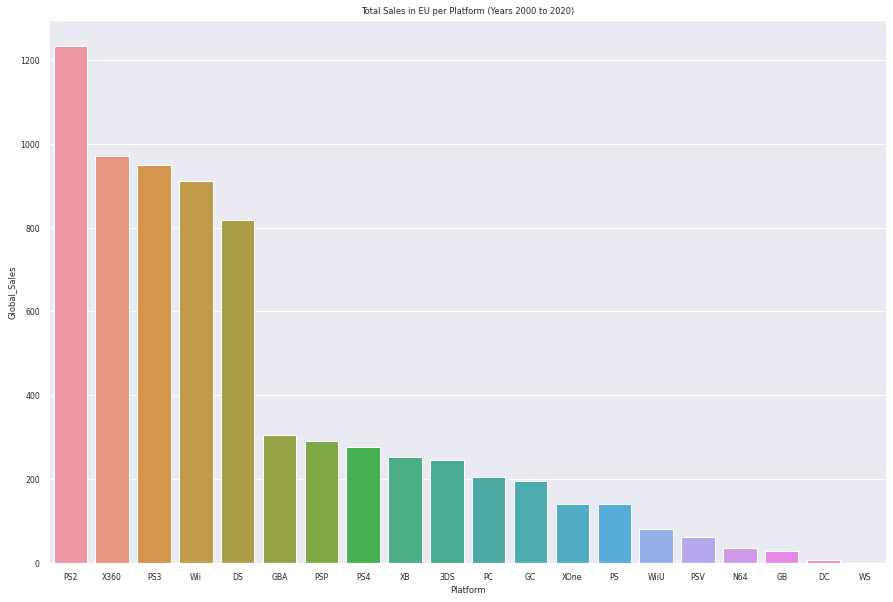

In [38]:
GL_plat = sales.groupby(by=['Platform'])['Global_Sales'].sum()
GL_plat = GL_plat.reset_index()
GL_plat = GL_plat.sort_values(by=['Global_Sales'], ascending=False)
plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="Global_Sales", data=GL_plat)
plt.title('Total Sales in EU per Platform (Years 2000 to 2020)')

#### Insight 7b  Global : PS2 are on top, as can be seen in various continents, followed by X360 and PS3.

### Sales per Publisher

Text(0.5, 1.0, 'Total Sales in NA per Publisher (Years 2000 to 2020)')

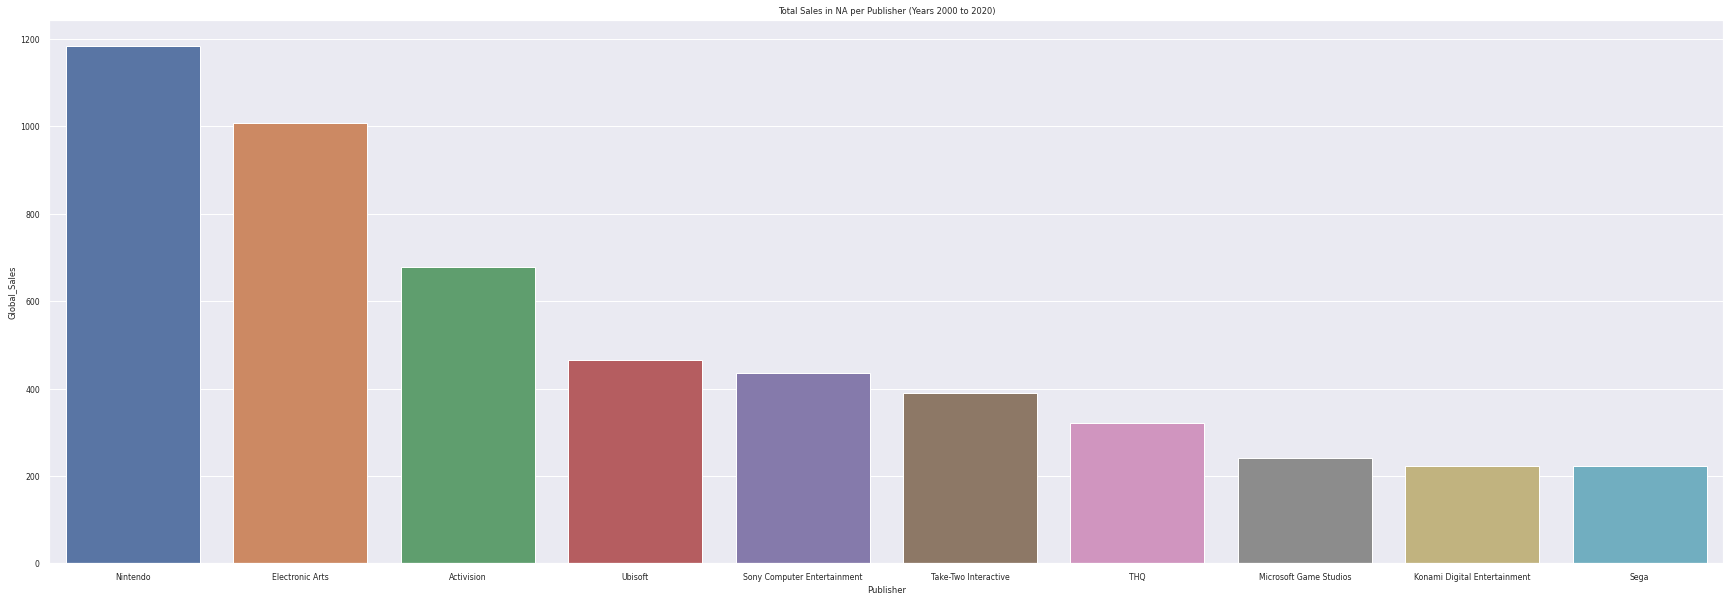

In [39]:
GL_pub = sales[['Publisher', 'Global_Sales']]
GL_pub = GL_pub.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)
GL_pub = pd.DataFrame(GL_pub).reset_index()
plt.figure(figsize=(30, 10))
sns.barplot(x="Publisher", y="Global_Sales",data=GL_pub)
plt.title('Total Sales in NA per Publisher (Years 2000 to 2020)')

#### Insight 7c  Global : For sales per publisher, Nintendo leads followed by EA and Activision.

### Overall Per Year Growth

In [40]:
yeargrowth = df.drop(columns = ['Genre', 'Name','Platform','NA_Sales','EU_Sales', 'JP_Sales','NA_Sales', 'Other_Sales'])
yeargrowth

,Rank,Year,Publisher,Global_Sales
0,1,2006.0,Nintendo,82.74
1,2,1985.0,Nintendo,40.24
2,3,2008.0,Nintendo,35.82
3,4,2009.0,Nintendo,33.00
4,5,1996.0,Nintendo,31.37
...,...,...,...,...
16593,16596,2002.0,Kemco,0.01
16594,16597,2003.0,Infogrames,0.01
16595,16598,2008.0,Activision,0.01
16596,16599,2010.0,7G//AMES,0.01


In [41]:
nintendogrow = yeargrowth[yeargrowth['Publisher'] == 'Nintendo']
eagrow = yeargrowth[yeargrowth['Publisher'] == 'Electronic Arts']
activisiongrow = yeargrowth[yeargrowth['Publisher'] == 'Activision']
sonygrow = yeargrowth[yeargrowth['Publisher'] == 'Sony Computer Entertainment']

Text(0.5, 1.0, 'Sony Sales Growth')

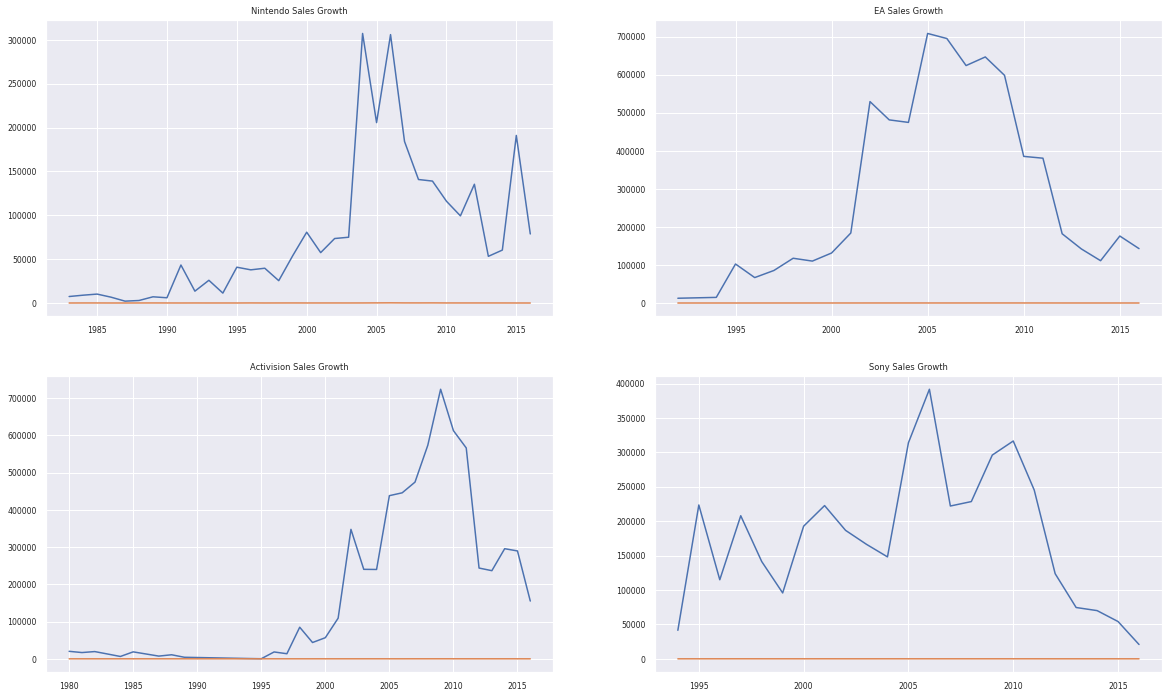

In [42]:
fig, ax = plt.subplots(2,2,figsize=(20,12))

nintendogrow = nintendogrow.groupby('Year').sum()
eagrow = eagrow.groupby('Year').sum()
activisiongrow = activisiongrow.groupby('Year').sum()
sonygrow = sonygrow.groupby('Year').sum()

ax[0,0].plot(nintendogrow)
ax[0,0].set_title('Nintendo Sales Growth')

ax[0,1].plot(eagrow)
ax[0,1].set_title('EA Sales Growth')

ax[1,0].plot(activisiongrow)
ax[1,0].set_title('Activision Sales Growth')

ax[1,1].plot(sonygrow)
ax[1,1].set_title('Sony Sales Growth')

#### Insight 8  Global : This is a visual representation of how sales of most famous platform has changed between 1985 - 2015.